In [1]:
!date

Tue May 30 10:00:33 EDT 2023


In [2]:
pwd

'/mmfs1/data/aglinska/BC-actionpred-seg'

In [3]:
import pandas as pd
import numpy as np
import pickle
import os
from matplotlib import pyplot as plt

/data/aglinska/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
from scipy.special import softmax

In [7]:
softmax_vals_orig_121_test = pickle.load(open('./Data/softmax_vals_orig_121_test.pickle','rb'))
softmax_vals_orig_121_val = pickle.load(open('./Data/softmax_vals_orig_121_val.pickle','rb'))

In [8]:
softmax_vals_bg_121_test = pickle.load(open('./Data/softmax_vals_bg_121_test.pickle','rb'))
softmax_vals_seg_121_test = pickle.load(open('./Data/softmax_vals_seg_121_test.pickle','rb'))

In [9]:
softmax_vals_orig_121_val.keys()

dict_keys(['categories', 'values'])

In [10]:
n = 121

In [39]:
#categories = softmax_vals_orig_121_val['categories']
categories = softmax_vals_orig_121_test['categories']

In [40]:
nframes = [len(i) for i in softmax_vals_orig_121_val['values']]

In [120]:
def get_acc_baseline(data):
    #data = softmax_vals_orig_121_test
    #data = data['values']

    acc_vec = []

    for c in range(len(data)):
        for f in range( len( data[c] ) ):
            acc_vec.append( data[c][f].argmax()==c )
    acc_vec = np.array(acc_vec)
    return acc_vec

<BarContainer object of 3 artists>

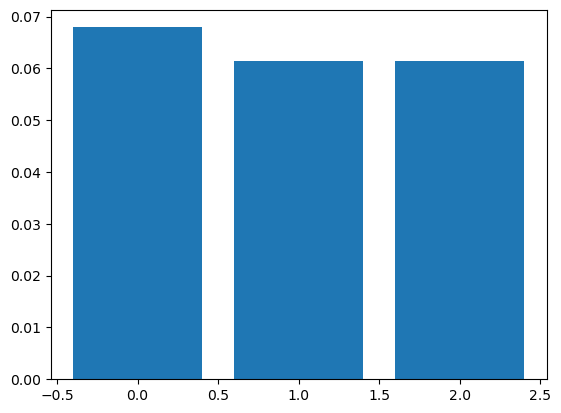

In [125]:
ys = [
    get_acc_baseline(softmax_vals_orig_121_test['values']).mean(),
    get_acc_baseline(softmax_vals_bg_121_test['values']).mean(),
    get_acc_baseline(softmax_vals_seg_121_test['values']).mean()
]
xs = [0,1,2]
plt.bar(xs,ys)

<BarContainer object of 3 artists>

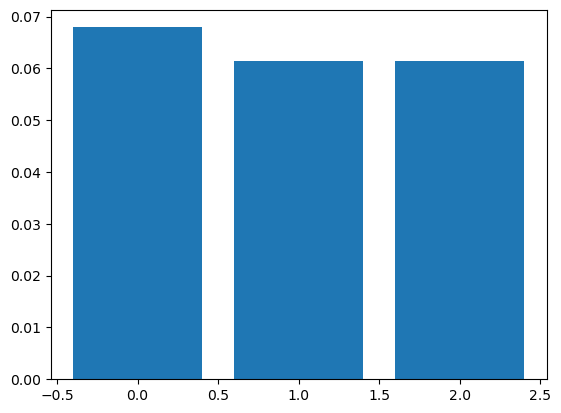

In [123]:
ys = [
    get_acc_baseline(softmax_vals_orig_121_test['values']).mean(),
    get_acc_baseline(softmax_vals_bg_121_test['values']).mean(),
    get_acc_baseline(softmax_vals_seg_121_test['values']).mean()
]
xs = [0,1,2]
plt.bar(xs,ys)

In [41]:
#np.array([softmax_vals_orig_121_val['values'][0][i] for i in range(nframes[0])])

In [101]:
# c = 2
# [plt.plot( softmax_vals_orig_121_val['values'][c][i]  ,'k.') for i in range(nframes[c])];

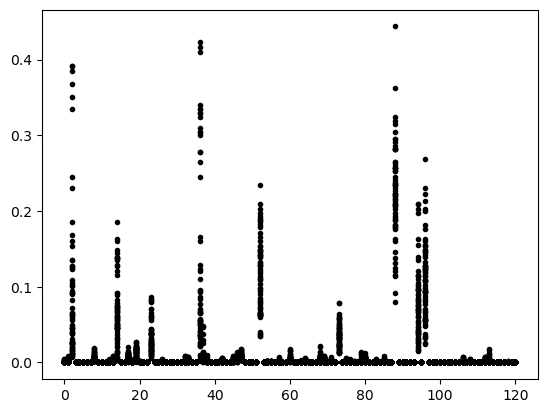

In [43]:
c = 2
[plt.plot(  softmax(softmax_vals_orig_121_val['values'][c][i])  ,'k.') for i in range(nframes[c])];

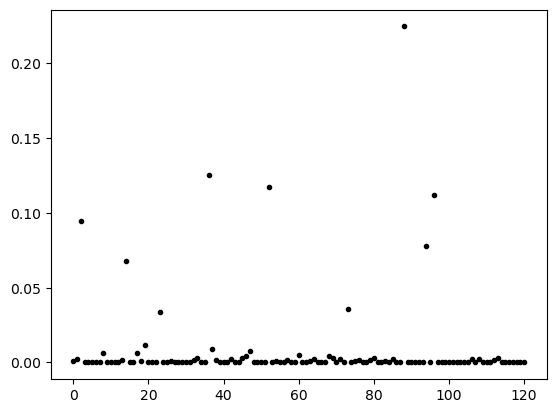

In [44]:
plt.plot( np.array([softmax(softmax_vals_orig_121_val['values'][c][i]) for i in range(nframes[c])]).mean(axis=0) , 'k.')

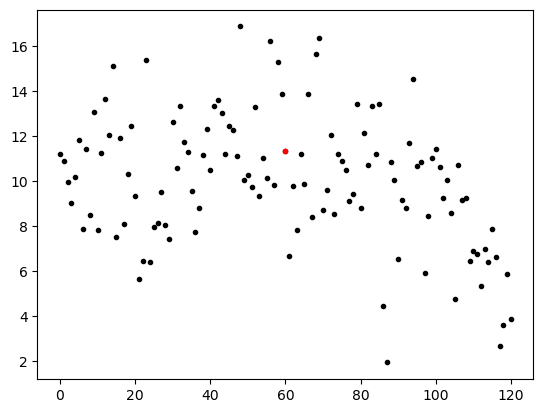

In [45]:
c = 60
plt.plot( np.array([softmax_vals_orig_121_val['values'][c][i] for i in range(nframes[c])]).mean(axis=0) , 'k.')
plt.plot(c,np.array([softmax_vals_orig_121_val['values'][c][i] for i in range(nframes[c])]).mean(axis=0)[c],'r.')

In [47]:
def get_avg_outlayer(c):
    return np.array([softmax_vals_orig_121_test['values'][c][i] for i in range( len(softmax_vals_orig_121_test['values'][c]) )]).mean(axis=0)
    #return np.array([softmax_vals_orig_121_val['values'][c][i] for i in range( len(softmax_vals_orig_121_val['values'][c]) )]).mean(axis=0)
    
    
    #return np.array([softmax_vals_orig_121_val['values'][c][i] for i in range(nframes[c])]).mean(axis=0)
    #return np.array([  softmax(softmax_vals_orig_121_val['values'][c][i])  for i in range(nframes[c])]).mean(axis=0)

In [102]:
triu_121 = np.triu_indices(n=121,k=1)

In [48]:
confmat = np.array([get_avg_outlayer(c) for c in range(n)]).astype(float)

In [49]:
values_diag = np.array([confmat[i,i] for i in range(n)])
values_triu = confmat[np.triu_indices(n=n,k=1)]

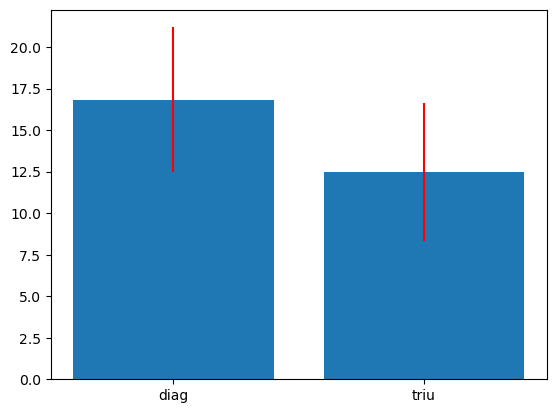

In [50]:
ys = [values_diag.mean(),values_triu.mean()]
se = [values_diag.std(),values_triu.std()]
xs = [0,1]

plt.bar(xs,ys)
plt.errorbar(xs,ys,se,fmt='r ');
plt.xticks(xs,labels=['diag','triu']);

In [72]:
vec = [confmat[c,c]-confmat[c,:].max() for c in range(n)]
vec = np.array(vec)
categories_80_idx = np.argsort(vec)[::-1]

In [94]:
nchoosecat = 120

In [95]:
categories_80 = np.array(categories)[categories_80_idx][0:nchoosecat]
print(categories_80[0:3])
print(categories_80[-3::])

['throw_paper-plane' 'closing_door' 'running_in_place']
['whipping' 'taekwondo_low_block' 'play_gong']


In [96]:
n_choices = 121

In [97]:
answer_choices_idx = [get_avg_outlayer(c).argsort()[np.linspace(0,nchoosecat,n_choices).astype(int)] for c in range(nchoosecat)]
#answer_choices_idx = [get_avg_outlayer(c).argsort()[0:5] for c in range(80)]
#answer_choices_idx = [get_avg_outlayer(c).argsort()[-5::] for c in range(80)]
answer_choices_idx = np.array(answer_choices_idx)
answer_choices_idx.shape

for i in range(nchoosecat):
    if categories_80_idx[i] not in answer_choices_idx[i,:]:
        answer_choices_idx[i,0] = categories_80_idx[i]

In [98]:
categories_80_idx[0:3]

array([94, 14, 73])

In [99]:
# data = softmax_vals_orig_121_test
# data = softmax_vals_seg_121_test
def get_acc(data):
    nframes = [len(i) for i in data['values']]
    data = data['values']

    acc_vec = []
    for c in range(nchoosecat):
        for f in range(len(data[c])):
            is_correct = data[c][f][answer_choices_idx[c,:]].argmax()==(answer_choices_idx[c,:]==categories_80_idx[c]).argmax()
            acc_vec.append( is_correct )

    return np.array(acc_vec).mean()-1/answer_choices_idx.shape[1]

<BarContainer object of 3 artists>

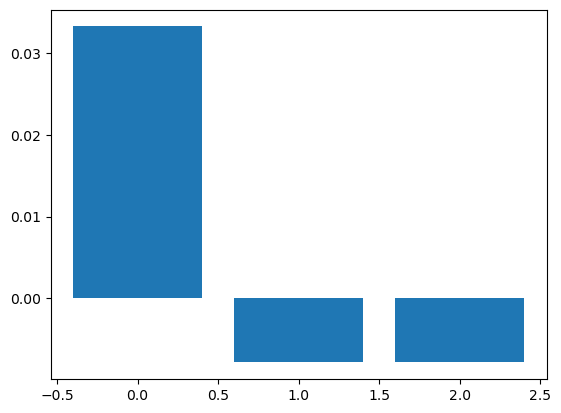

In [100]:
acc1 = get_acc(softmax_vals_orig_121_test)
acc2 = get_acc(softmax_vals_bg_121_test)
acc3 = get_acc(softmax_vals_seg_121_test)

ys = [acc1,acc2,acc3]
xs = [0,1,2]
plt.bar(xs,ys)